In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# 读取所有股票信息，并切片出缩写名
all_stocks = pd.read_csv('selected_30_stocks.csv')
all_stocks = all_stocks.drop(columns=['Unnamed: 0','name'])

'''
随机选取10支股票,把股票名放进数组
@return: 放有10支随机选取的股票名的数组
''' 
def select_10_stocks_randomly():
    
    global select_10_stocks_array
    select_10_stocks = all_stocks.sample(n=10, replace=False, axis=0)
    select_10_stocks_array = select_10_stocks['stock'].values
    
    return select_10_stocks_array

# select_10_stocks_randomly()


In [3]:
'''
根据数组中的函数名生成dataframe
@return: 装有10个dataframe的字典
'''
def generate_dataframe():
    
    # 根据股票名读取 csv，生成对应 dataframe 并存进字典中
    global stock_name
    stock_name = {}
    
    for name in select_10_stocks_array:
        stock_name[name] = pd.read_csv(name + '_week_features.csv') 
        stock_name[name] = stock_name[name].drop(columns=['Unnamed: 0',
                                                          'name',
                                                          'start_time',
                                                          'end_time',
                                                          'days',
                                                          '成交量均值',
                                                          '成交金额均值',
                                                          '上周涨跌幅',
                                                          '涨跌幅均值',
                                                          '股价波动程度',
                                                          '开收盘价方差'], axis=1)
    return stock_name

# generate_dataframe()


In [4]:
'''
选取所有股票,把股票名放进数组
@return: 放有所有股票名的数组
''' 
def select_all_stocks(): 
    
    global select_all_stocks_array
    select_all_stocks_array = all_stocks['stock'].values
    
    return select_all_stocks_array

# select_10_stocks_randomly()

In [5]:
'''
读生成所有股票的dataframe
@return: 装有所有dataframe的字典
'''
def generate_all_dataframe(include_time = False):
    
    # 根据股票名读取 csv，生成对应 dataframe 并存进字典中
    global all_stock_name
    all_stock_name = {}
    
    for name in select_all_stocks_array:
        all_stock_name[name] = pd.read_csv(name + '_week_features.csv') 
        if include_time is True:
            all_stock_name[name] = all_stock_name[name].drop(columns=['Unnamed: 0',
                                                                      'name',
                                                                      'end_time',
                                                                      'days',
                                                                      '成交量均值',
                                                                      '成交金额均值',
                                                                      '上周涨跌幅',
                                                                      '涨跌幅均值',
                                                                      '股价波动程度',
                                                                      '开收盘价方差'], axis=1)
        else:
            all_stock_name[name] = all_stock_name[name].drop(columns=['Unnamed: 0',
                                                                      'name',
                                                                      'start_time',
                                                                      'end_time',
                                                                      'days',
                                                                      '成交量均值',
                                                                      '成交金额均值',
                                                                      '上周涨跌幅',
                                                                      '涨跌幅均值',
                                                                      '股价波动程度',
                                                                      '开收盘价方差'], axis=1)
    return all_stock_name

# generate_all_dataframe()


In [6]:
# 字典中的dataframe效果
# stock_name['LUV']


In [7]:
'''
随机策略计算第i周的收益率
@param i: 周数
@return: 第i周收益率数值
'''
def calculate_weekprofit(i):

    for value in stock_name.values():
        
        global week_total_profit
        week_total_profit = 0
    
        week_total_profit = week_total_profit + value.iloc[i,1] * 0.1
    
    return week_total_profit
 

# calculate_weekprofit(0)


In [8]:
select_all_stocks()
generate_all_dataframe(include_time = True)
all_stock_name['WELL']

,stock,start_time,未来一周的收益率
0,WELL,2017-01-02 00:00:00.000000000,-0.026150
1,WELL,2017-01-09 00:00:00.000000000,0.001500
2,WELL,2017-01-16 00:00:00.000000000,-0.012283
3,WELL,2017-01-23 00:00:00.000000000,0.005451
4,WELL,2017-01-30 00:00:00.000000000,0.006725
...,...,...,...
295,WELL,2022-08-29 00:00:00.000000000,0.023210
296,WELL,2022-09-05 00:00:00.000000000,-0.061477
297,WELL,2022-09-12 00:00:00.000000000,-0.083906
298,WELL,2022-09-19 00:00:00.000000000,-0.035827


In [9]:
'''
计算第i周的大盘收益率
@param i: 周数
@return: 第i周大盘收益率数值
'''
def calculate_all_weekprofit(i):
    for value in all_stock_name.values():       
        global all_week_total_profit
        all_week_total_profit = 0 
        all_week_total_profit = all_week_total_profit + value.iloc[i,1] * (1/30)  
    return all_week_total_profit
 
# calculate_weekprofit(0)


In [10]:
#########################################################
#根据PCA得到的股票惩成分计算收益
# 读取原始数据表
select_all_stocks()
generate_all_dataframe()#all_stock_name
# 和选取股票的策略表
selected_stock = pd.read_csv('10p each.csv')
selected_stock = selected_stock.rename(columns = {'Unnamed: 0':'week'})

'''
PCA策略计算第i周的收益率
@param i: 周数
@return: 第i周收益率数值
'''
def calculate_weekprofit1(i, data):
    total_profit = 0
    #week = data[data['start_time']==data['start_time'][i+3]]
    stocks = selected_stock.iloc[i]#第i个策略对应第i+3周的数据
    #week = week.loc[week['stock'].isin(stocks)] #找到策略对应的十只股票
    for j in range(1, len(stocks)):
        stock = stocks[j]
        #total_profit += all_stock_name[stock].iloc[j]['未来一周的收益率']
        total_profit += data[stock].iloc[j]['未来一周的收益率'] * 0.1
    return total_profit

profit = pd.DataFrame(columns=['week_profit'])
for i in range(298-4):
    profit.loc[i] = calculate_weekprofit1(i, all_stock_name)
profit
######################################################

,week_profit
0,0.004627
1,-0.000704
2,0.004735
3,-0.004218
4,0.000635
...,...
289,0.009615
290,0.001857
291,0.009897
292,0.009464


In [11]:
profit.index = profit.index+4
profit

,week_profit
4,0.004627
5,-0.000704
6,0.004735
7,-0.004218
8,0.000635
...,...
293,0.009615
294,0.001857
295,0.009897
296,0.009464


In [12]:
# 主函数，计算297周的总收益，并存进profit表里
random_profit = pd.DataFrame(columns=['week_profit'])

for i in range(298):
    
    total_profit = 0
    
    select_10_stocks_randomly()
    generate_dataframe()
    calculate_weekprofit(i)
    
    random_profit.loc[i] = week_total_profit


In [13]:
#计算294周的大盘总收益，并存进all_profit表里
all_profit = pd.DataFrame(columns=['all_week_profit'])

for i in range(4,298):
    
    total_profit = 0
    
    select_all_stocks()
    generate_all_dataframe()
    calculate_all_weekprofit(i)
    
    all_profit.loc[i] = all_week_total_profit


In [14]:
all_profit

,all_week_profit
4,0.001154
5,0.001590
6,0.000709
7,0.000182
8,-0.001633
...,...
293,-0.000308
294,-0.000702
295,0.001479
296,-0.003162


In [15]:
# 转置策略收益率表
three_profit = pd.read_csv('three_profit.csv')
three_profit = three_profit.stack()
three_profit = three_profit.unstack(0)


In [16]:
# 补充策略收益率表
d = {0:['0.225766', '0.225766', '0.225766']}
df = pd.DataFrame(d) 
df


,0
0,0.225766
1,0.225766
2,0.225766


In [17]:
# 去除无用列
three_profit = three_profit.drop(labels=['Unnamed: 0', 'index'])


In [18]:
# 分割不同策略
three_profit_09 = three_profit[0]
three_profit_05 = three_profit[1]
three_profit_01 = three_profit[2]

In [19]:
three_profit_09


0      0.225766
1      0.348072
2      0.903805
3      0.667169
4      0.916600
         ...   
290    0.290490
291   -0.033396
292    0.233623
293    0.116632
294   -0.177222
Name: 0, Length: 295, dtype: float64

In [20]:
# 合并两个策略表
three_profit_09 = pd.concat([df,three_profit_09], ignore_index=True) #普通纵向合并
three_profit_05 = pd.concat([df,three_profit_05], ignore_index=True) #普通纵向合并
three_profit_01 = pd.concat([df,three_profit_01], ignore_index=True) #普通纵向合并


In [21]:
# 绘图前需统一为浮点数，否则会报错
three_profit_09 = three_profit_09.astype('float64')
three_profit_05 = three_profit_05.astype('float64')
three_profit_01 = three_profit_01.astype('float64')


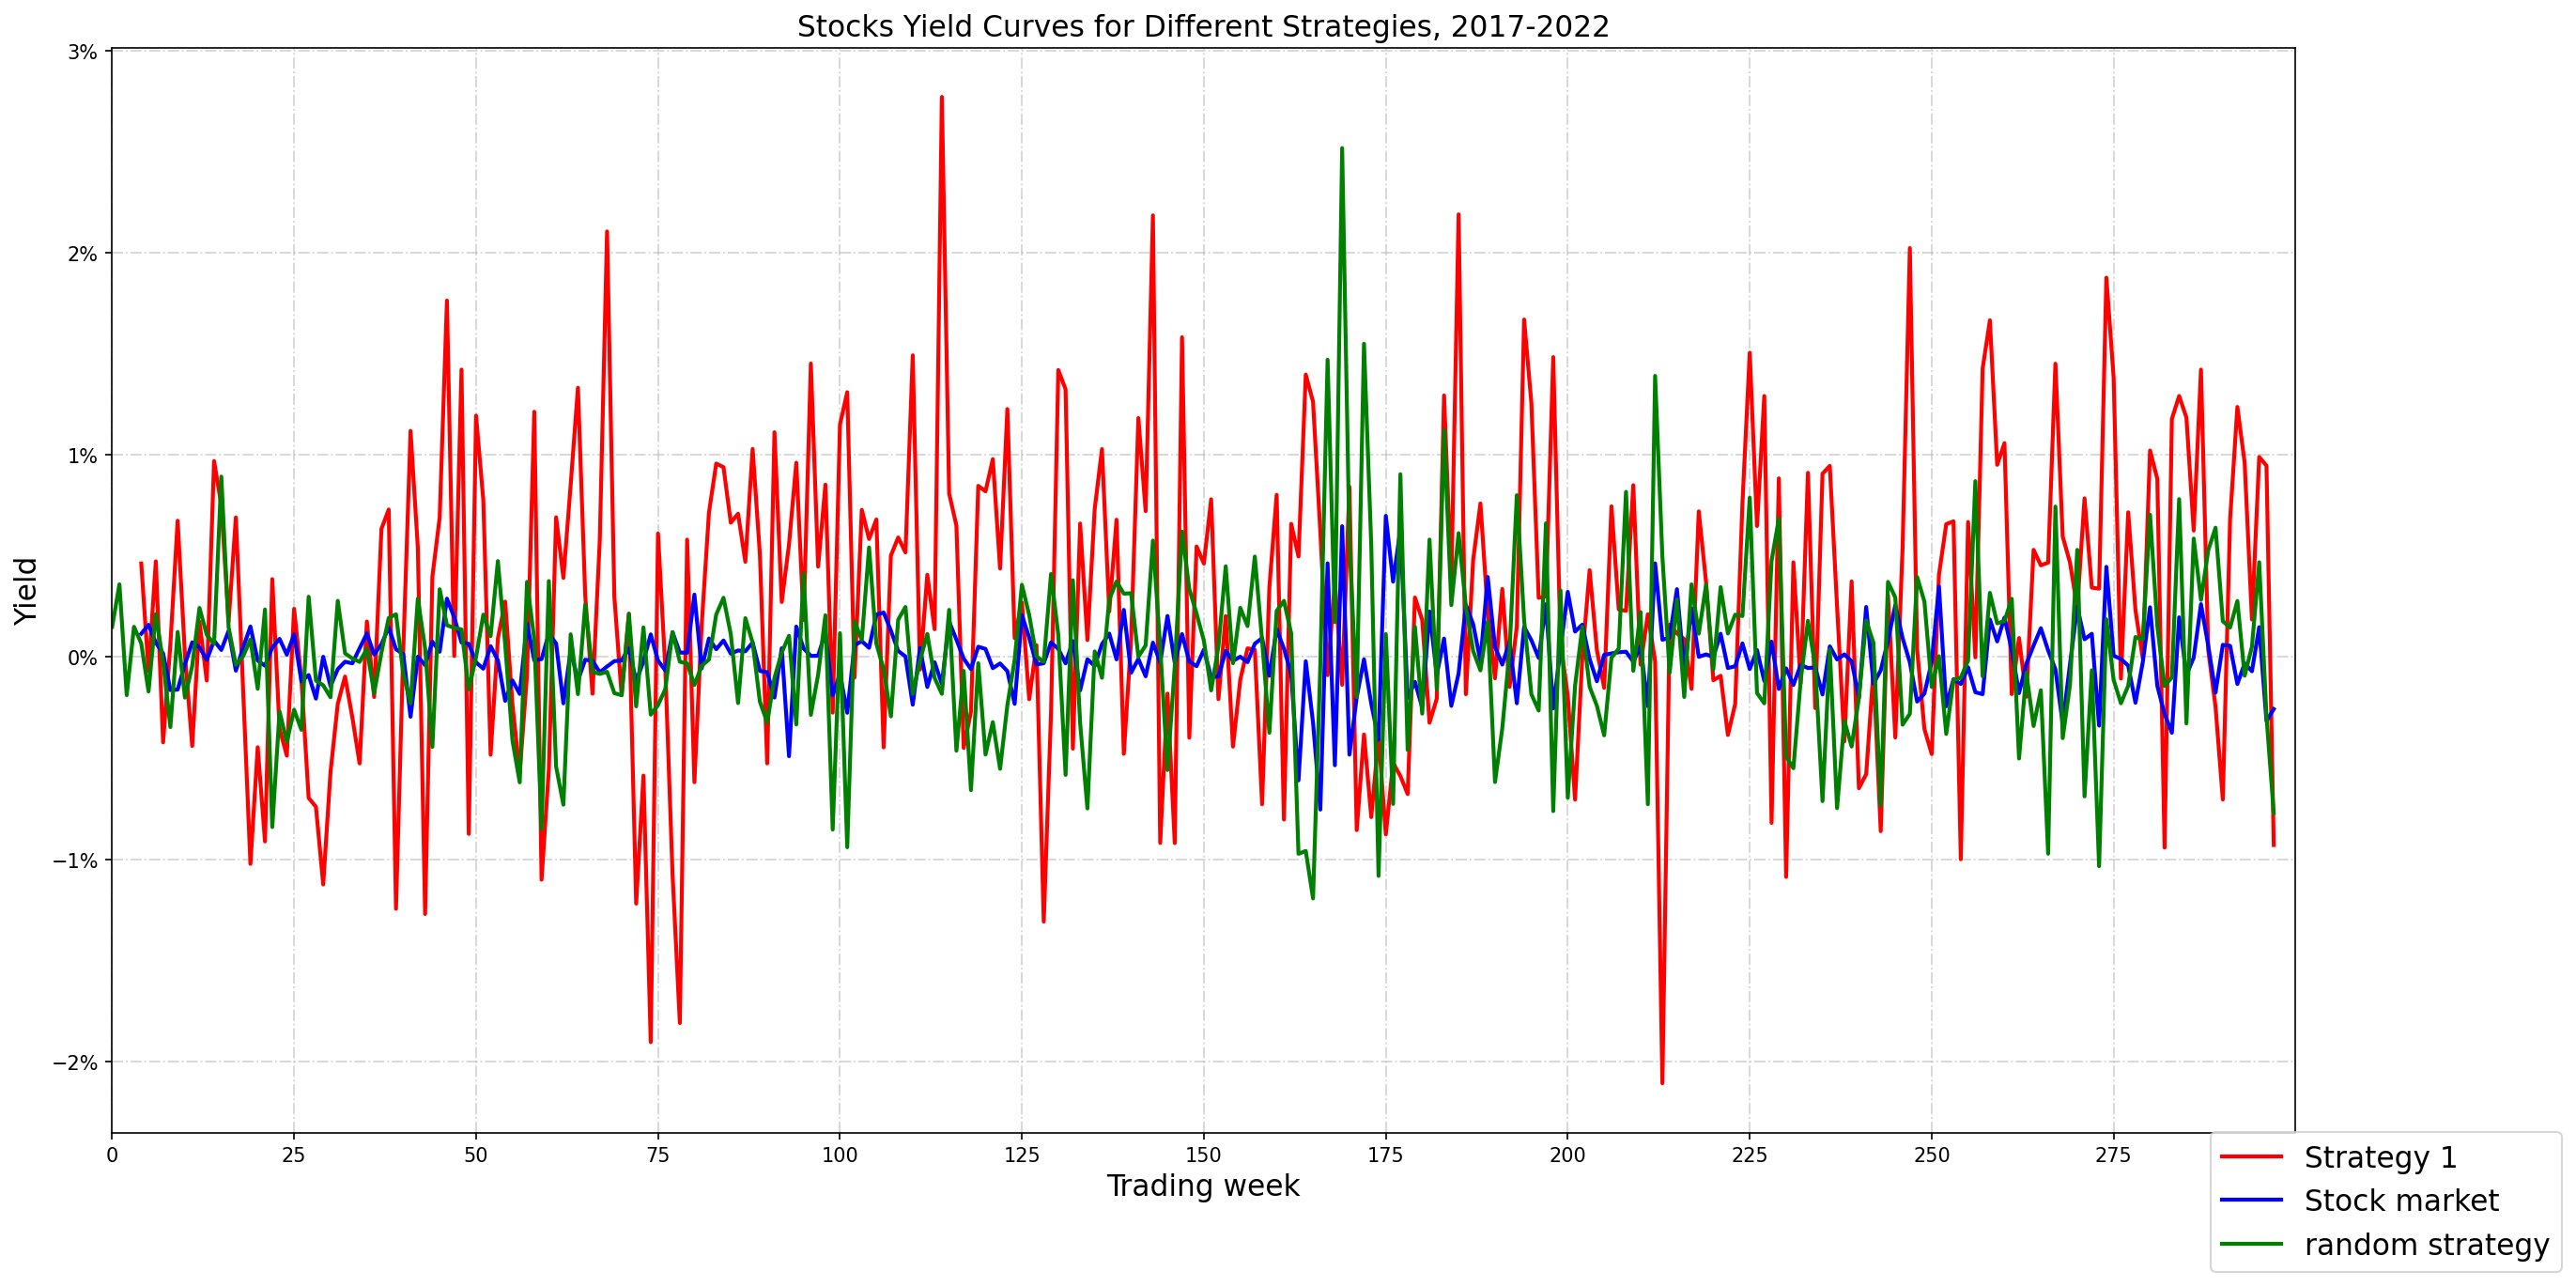

In [22]:
from matplotlib import ticker

plt.figure(figsize=(20, 10), dpi=150, frameon=True)

# pca策略收益曲线
plt.plot(profit.index, profit, label='yield_curve', ls="-", c='Red', lw=2)
# 大盘收益曲线
plt.plot(all_profit.index, all_profit, label='yield_curve', ls="-", c='blue', lw=2)
# 随机策略收益曲线
plt.plot(random_profit.index, random_profit, label='yield_curve', ls="-", c='green', lw=2)
# u=0.9 策略收益曲线
#plt.plot(three_profit_09.index, three_profit_09, label='yield_curve', ls="-", c='green', lw=2)
# u=0.5 策略收益曲线
#plt.plot(three_profit_05.index, three_profit_05, label='yield_curve', ls="-", c='purple', lw=2)
# u=0.1 策略收益曲线
#plt.plot(three_profit_01.index, three_profit_01, label='yield_curve', ls="-", c='orange', lw=2)

# x轴标签
plt.xlabel('Trading week', fontsize=15)

# y轴标签
plt.ylabel('Yield', fontsize=15)

# 图表标题
plt.title('Stocks Yield Curves for Different Strategies, 2017-2022',fontsize=15)

# 图表背景
plt.grid(alpha=0.5, linestyle='-.', linewidth=0.9)

# 线条标签
plt.figlegend(['Strategy 1','Stock market','random strategy','u=0.5','u=0.1'], loc='lower right', fontsize=15)

# x轴范围
plt.xlim(0,300)

# y轴范围
#plt.ylim(-0.05,0.05)

# x轴标签间隔
plt.xticks (range(0, 300, 25))

# y轴使用百分比展示
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))


plt.show()


In [23]:
# 读取股票系数数据集，u=0.9/0.5/0.1表示不同策略，行为交易周数，列为30支股票对应持仓比例
param = pd.read_csv('params_limit0.2.csv')
#param = pd.read_csv('params_30_0.1.csv')
param

,Unnamed: 0,u,week,0,1,2,3,4,5,6,...,21,22,23,24,25,26,27,28,29,30
0,coefficients,0.9,3,0.000000,0.0,0.0,0.2,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.2,0.0,-0.000000
1,coefficients,0.9,3,0.000000,0.0,0.0,0.2,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.2,0.0,-0.000000
2,coefficients,0.9,4,0.000000,0.0,0.0,0.2,0.000000,0.0,0.0,...,0.2,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.000000
3,coefficients,0.9,5,0.000000,0.0,0.0,0.2,0.000000,0.0,0.0,...,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.2,-0.0,-0.000000
4,coefficients,0.9,6,0.000000,0.0,0.0,0.0,0.000000,0.0,0.2,...,-0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.2,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,coefficients,0.1,293,0.200000,0.0,0.0,0.2,0.000000,0.0,0.0,...,0.2,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.129835
882,coefficients,0.1,294,0.200000,0.0,0.0,0.2,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071128
883,coefficients,0.1,295,0.200000,0.0,-0.0,0.2,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052266
884,coefficients,0.1,296,0.200000,0.0,0.2,0.2,0.200000,0.0,0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102165


In [24]:
# 分割u不同的数据集
param_09 = param[param['u']==0.9]
param_05 = param[param['u']==0.5]
param_01 = param[param['u']==0.1]


In [25]:
param_09 = param_09.drop(columns=['Unnamed: 0', 'u', 'week', '30'])
param_05 = param_05.drop(columns=['Unnamed: 0', 'u', 'week', '30'])
param_01 = param_01.drop(columns=['Unnamed: 0', 'u', 'week', '30'])

In [26]:
param_09

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.0,0.000000,0.200000,0.000000,0.0,0.000000,0.0,0.0,0.2,...,0.0,0.0,0.000000,0.0,0.000000,0.0,-0.0,0.0,0.2,0.0
1,0.000000,0.0,0.000000,0.200000,0.000000,0.0,0.000000,0.0,0.0,0.2,...,0.0,0.0,0.000000,0.0,0.000000,0.0,-0.0,0.0,0.2,0.0
2,0.000000,0.0,0.000000,0.200000,0.000000,0.0,0.000000,0.0,0.0,0.2,...,0.0,0.2,0.000000,0.0,0.000000,0.0,0.0,0.0,-0.0,0.0
3,0.000000,0.0,0.000000,0.200000,0.000000,0.0,0.000000,0.0,0.0,0.2,...,0.0,0.2,0.000000,0.2,0.000000,0.0,0.0,0.0,0.2,-0.0
4,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.200000,0.0,0.0,0.2,...,-0.0,-0.0,0.000000,0.2,0.000000,0.0,0.0,0.2,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,-0.000000,0.0,0.000000,0.200000,0.000000,0.0,0.200000,-0.0,-0.0,0.0,...,0.0,0.2,0.000000,0.0,-0.000000,0.0,0.2,0.0,0.0,0.0
292,0.011677,0.0,0.028318,0.200000,0.027421,0.0,0.046545,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
293,0.000000,0.0,0.200000,0.200000,-0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
294,0.004833,0.2,0.011410,0.029602,0.012249,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.200000,0.0,0.006746,0.0,0.0,0.0,0.0,0.0


In [27]:
# 前两周数据缺失，所以我把第三周的数据复制两遍当做前两周的数据
temp1 = param_09[0:1]
temp2 = param_05[0:2]
temp3 = param_01[0:2]
for i in range(2):
    param_09 = pd.concat([temp1,param_09], ignore_index=True)
temp = param_05[0:1]
for i in range(2):
    param_05 = pd.concat([temp2,param_05], ignore_index=True)
temp = param_01[0:1]
for i in range(2):
    param_01 = pd.concat([temp3,param_01], ignore_index=True)

In [28]:
param_09

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.0,0.000000,0.200000,0.000000,0.0,0.000000,0.0,0.0,0.2,...,0.0,0.0,0.000000,0.0,0.000000,0.0,-0.0,0.0,0.2,0.0
1,0.000000,0.0,0.000000,0.200000,0.000000,0.0,0.000000,0.0,0.0,0.2,...,0.0,0.0,0.000000,0.0,0.000000,0.0,-0.0,0.0,0.2,0.0
2,0.000000,0.0,0.000000,0.200000,0.000000,0.0,0.000000,0.0,0.0,0.2,...,0.0,0.0,0.000000,0.0,0.000000,0.0,-0.0,0.0,0.2,0.0
3,0.000000,0.0,0.000000,0.200000,0.000000,0.0,0.000000,0.0,0.0,0.2,...,0.0,0.0,0.000000,0.0,0.000000,0.0,-0.0,0.0,0.2,0.0
4,0.000000,0.0,0.000000,0.200000,0.000000,0.0,0.000000,0.0,0.0,0.2,...,0.0,0.2,0.000000,0.0,0.000000,0.0,0.0,0.0,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,-0.000000,0.0,0.000000,0.200000,0.000000,0.0,0.200000,-0.0,-0.0,0.0,...,0.0,0.2,0.000000,0.0,-0.000000,0.0,0.2,0.0,0.0,0.0
294,0.011677,0.0,0.028318,0.200000,0.027421,0.0,0.046545,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
295,0.000000,0.0,0.200000,0.200000,-0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
296,0.004833,0.2,0.011410,0.029602,0.012249,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.200000,0.0,0.006746,0.0,0.0,0.0,0.0,0.0


In [31]:
# 为了便于理解，下面举例解释一下计算过程：
# 放有30支股票df的字典中取第1个df ↓   取收益率列 ↓  第1周 ↓
list(all_stock_name.values())[0]#['未来一周的收益率'][0]

,stock,未来一周的收益率
0,AES,-0.008460
1,AES,-0.026451
2,AES,-0.000877
3,AES,0.007979
4,AES,0.021108
...,...,...
295,AES,0.048948
296,AES,-0.055049
297,AES,-0.062886
298,AES,-0.069576


In [32]:
def calculate_final_profit(param):
    global final_week_profit
    global final_profit
    final_week_profit = 0
    final_profit = pd.DataFrame(columns=['final_profit'])
    
    # 计算从0-297周
    for week in range(298):  #38    
        # 计算从第0支股票到第29支股票
        for coef in range(30):
            
            '''
            计算单支股票的最终收益率
            
            为了便于理解，下面举例解释一下计算过程：
            
                  这是周数↓       ↓第coef支的系数 
            param.iloc[week,:][coef] 
                            ↑当周的所有系数 
            
              放有30支股票df的字典中取第coef个df↓  取收益率列↓         ↓第week周
            list(all_stock_name.values())[coef]['未来一周的收益率'][0]
            
            '''
            final_week_profit = final_week_profit + (param.iloc[week,:][coef] * \
                                                    list(all_stock_name.values())[coef]['未来一周的收益率'][week])
                
        final_profit.loc[week] = final_week_profit
    
    return final_profit

In [33]:
profit_09 = calculate_final_profit(param_09)
profit_05 = calculate_final_profit(param_05)
profit_01 = calculate_final_profit(param_01)

In [34]:
profit_09

,final_profit
0,0.009121
1,0.013980
2,0.041302
3,0.047277
4,0.058499
...,...
293,4.094209
294,4.080009
295,4.129564
296,4.107945


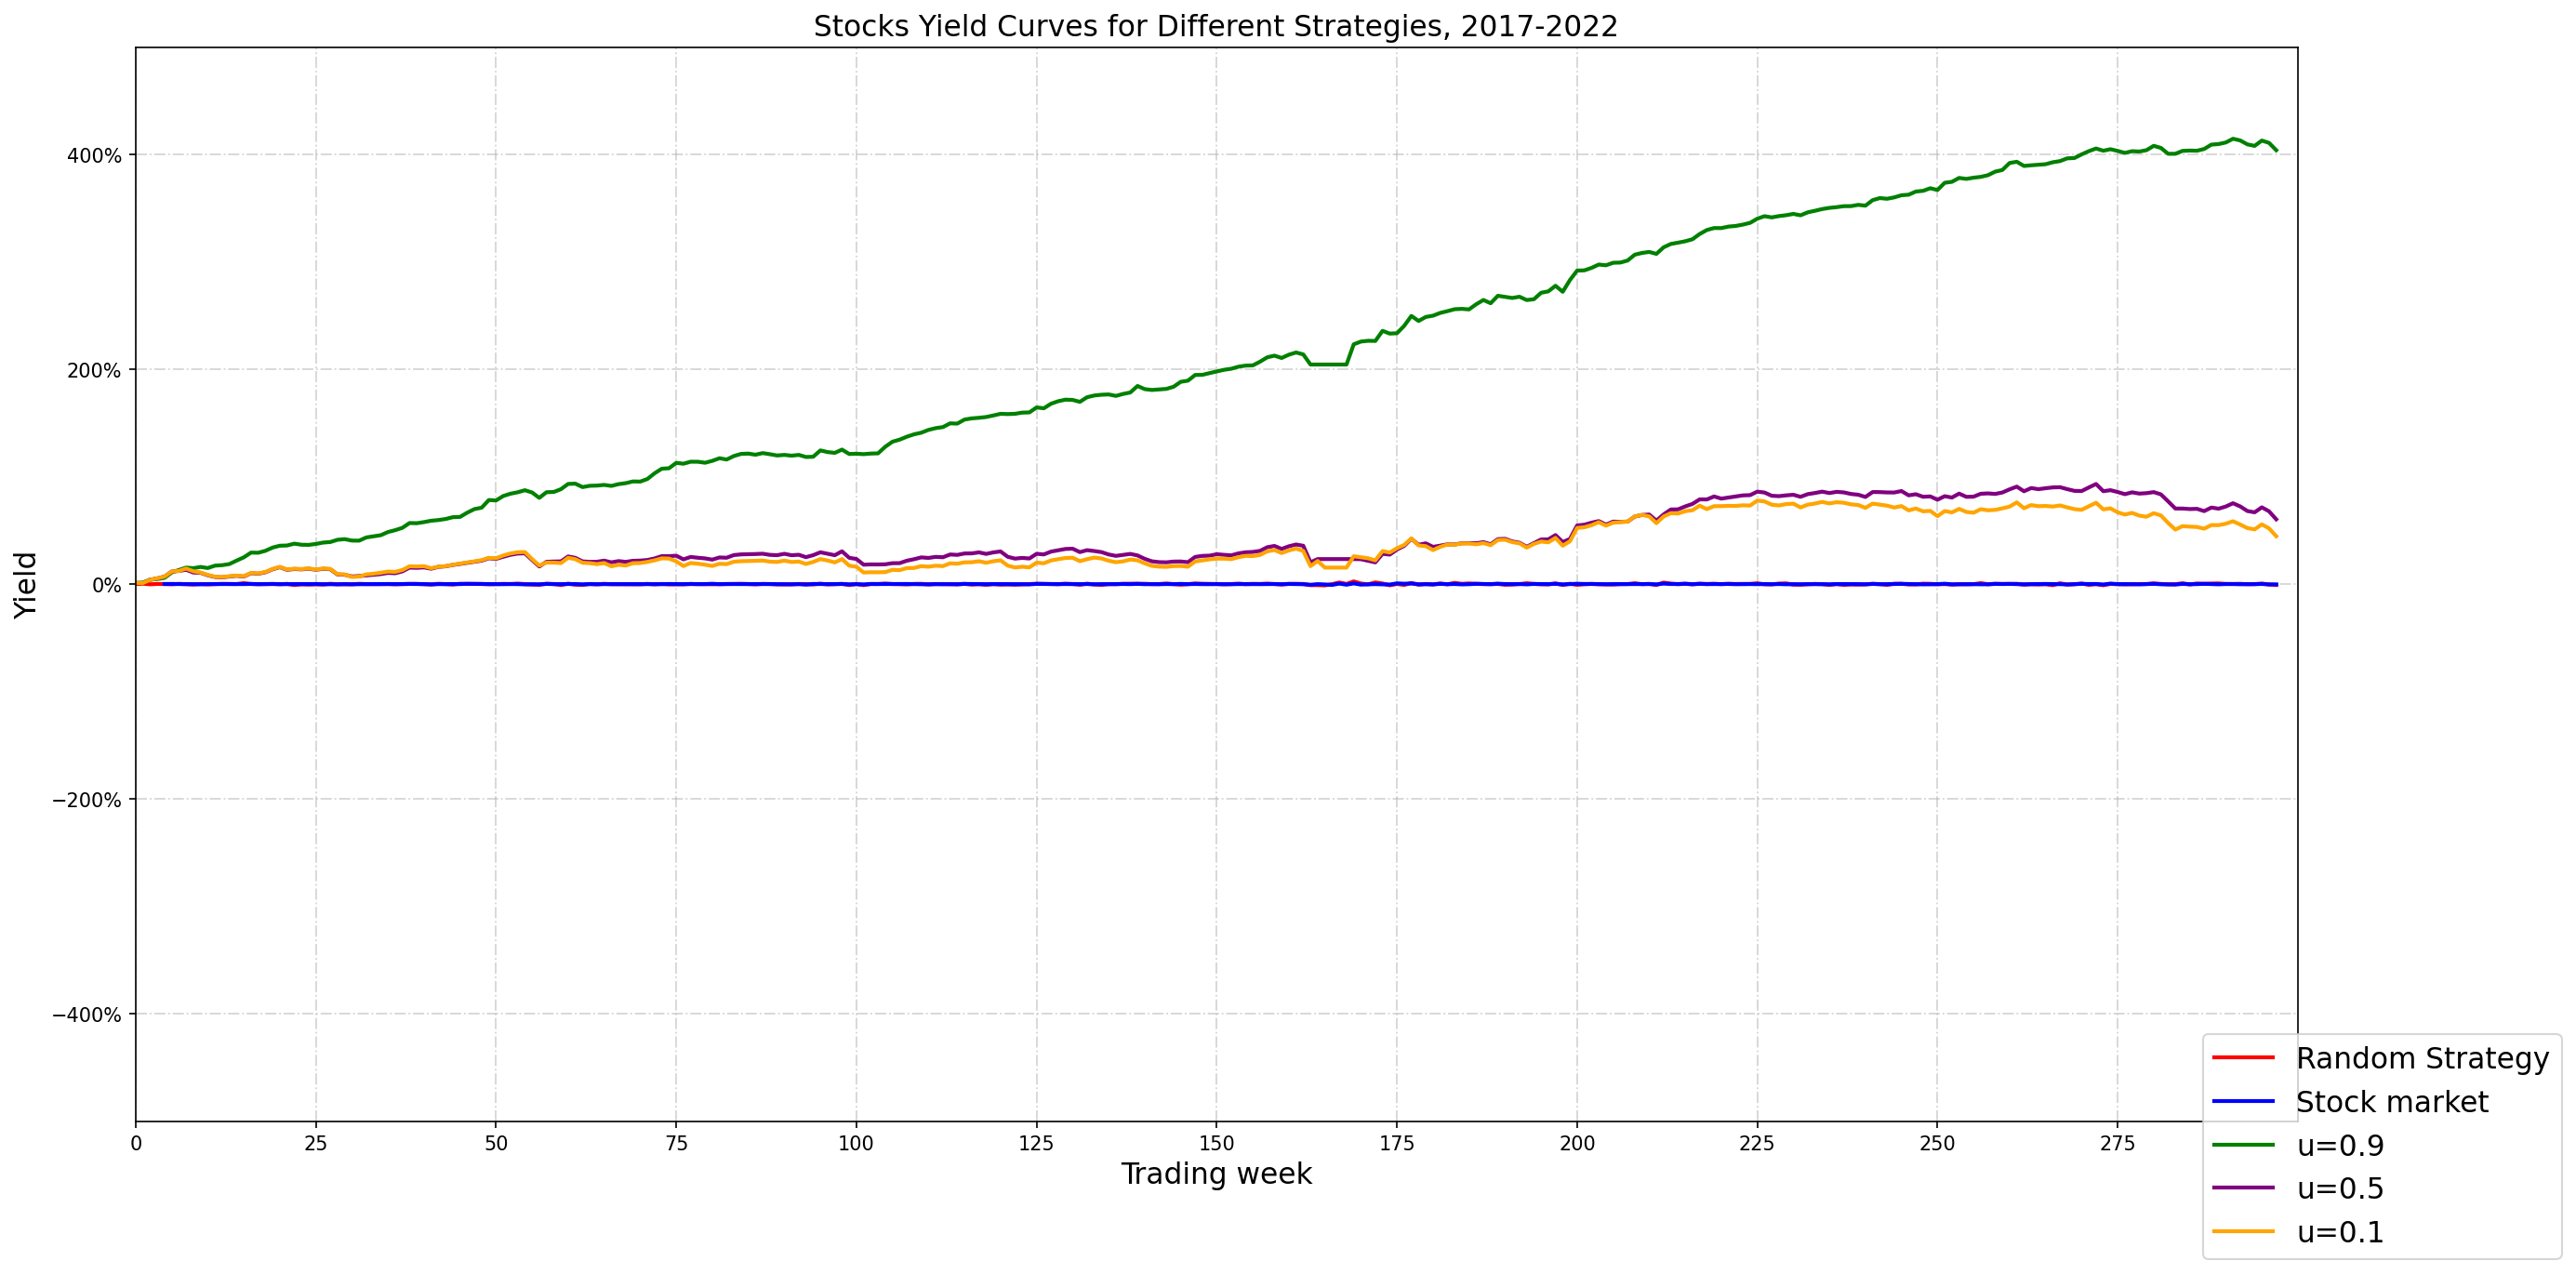

In [35]:
from matplotlib import ticker

plt.figure(figsize=(20, 10), dpi=150, frameon=True)

# 随机策略收益曲线
plt.plot(random_profit.index, random_profit, label='yield_curve', ls="-", c='Red', lw=2)
# 大盘收益曲线
plt.plot(all_profit.index, all_profit, label='yield_curve', ls="-", c='blue', lw=2)
# u=0.9 策略收益曲线
plt.plot(profit_09.index, profit_09, label='yield_curve', ls="-", c='green', lw=2)
# u=0.5 策略收益曲线
plt.plot(profit_05.index, profit_05, label='yield_curve', ls="-", c='purple', lw=2)
# u=0.1 策略收益曲线
plt.plot(profit_01.index, profit_01, label='yield_curve', ls="-", c='orange', lw=2)

# x轴标签
plt.xlabel('Trading week', fontsize=15)

# y轴标签
plt.ylabel('Yield', fontsize=15)

# 图表标题
plt.title('Stocks Yield Curves for Different Strategies, 2017-2022',fontsize=15)

# 图表背景
plt.grid(alpha=0.5, linestyle='-.', linewidth=0.9)

# 线条标签
plt.figlegend(['Random Strategy','Stock market','u=0.9','u=0.5','u=0.1'], loc='lower right', fontsize=15)

# x轴范围
plt.xlim(0,300)#300

# y轴范围
plt.ylim(-5,5)

# x轴标签间隔
plt.xticks(range(0, 300, 25))

# y轴使用百分比展示
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))


plt.show()

In [36]:
def plot(csv):
    dict1 = {"params_30.csv": "None", "params_30_0.1.csv": "10%", "params_30_0.2.csv": "20%"}
    # 读取股票系数数据集，u=0.9/0.5/0.1表示不同策略，行为交易周数，列为30支股票对应持仓比例
    param = pd.read_csv(csv)
    # 分割u不同的数据集
    param_09 = param[param['u']==0.9]
    param_05 = param[param['u']==0.5]
    param_01 = param[param['u']==0.1]
    param_09 = param_09.drop(columns=['Unnamed: 0', 'u', 'week', '30'])
    param_05 = param_05.drop(columns=['Unnamed: 0', 'u', 'week', '30'])
    param_01 = param_01.drop(columns=['Unnamed: 0', 'u', 'week', '30'])
    temp1 = param_09[0:1]
    temp2 = param_05[0:2]
    temp3 = param_01[0:2]
    for i in range(2):
        param_09 = pd.concat([temp1,param_09], ignore_index=True)
        temp = param_05[0:1]
    for i in range(2):
        param_05 = pd.concat([temp2,param_05], ignore_index=True)
        temp = param_01[0:1]
    for i in range(2):
        param_01 = pd.concat([temp3,param_01], ignore_index=True)
    def calculate_final_profit(param):
        global final_week_profit
        global final_profit
        final_week_profit = 0
        final_profit = pd.DataFrame(columns=['final_profit'])
    
        # 计算从0-38周
        for week in range(38):  #38    
            # 计算从第0支股票到第29支股票
            for coef in range(30):
            
                '''
                计算单支股票的最终收益率
            
                为了便于理解，下面举例解释一下计算过程：
            
                      这是周数↓       ↓第coef支的系数 
                param.iloc[week,:][coef] 
                                ↑当周的所有系数 
            
                  放有30支股票df的字典中取第coef个df↓  取收益率列↓         ↓第week周
                list(all_stock_name.values())[coef]['未来一周的收益率'][0]
            
                '''
                final_week_profit = final_week_profit + (param.iloc[week,:][coef] * \
                                                        list(all_stock_name.values())[coef]['未来一周的收益率'][week])
                
            final_profit.loc[week] = final_week_profit
    
        return final_profit

    profit_09 = calculate_final_profit(param_09)
    profit_05 = calculate_final_profit(param_05)
    profit_01 = calculate_final_profit(param_01)

    from matplotlib import ticker

    plt.figure(figsize=(20, 10), dpi=150, frameon=True)

    # 随机策略收益曲线
    plt.plot(random_profit.index, random_profit, label='yield_curve', ls="-", c='Red', lw=2)
    # 大盘收益曲线
    plt.plot(all_profit.index, all_profit, label='yield_curve', ls="-", c='blue', lw=2)
    # u=0.9 策略收益曲线
    plt.plot(profit_09.index, profit_09, label='yield_curve', ls="-", c='green', lw=2)
    # u=0.5 策略收益曲线
    plt.plot(profit_05.index, profit_05, label='yield_curve', ls="-", c='purple', lw=2)
    # u=0.1 策略收益曲线
    plt.plot(profit_01.index, profit_01, label='yield_curve', ls="-", c='orange', lw=2)

    # x轴标签
    plt.xlabel('Trading week', fontsize=15)

    # y轴标签
    plt.ylabel('Yield', fontsize=15)

    # 图表标题
    plt.title("Stocks Yield Curves for Different Strategies with each stock limit: {0}, 2022 ".format(dict1[csv]),fontsize=15)

    # 图表背景
    plt.grid(alpha=0.5, linestyle='-.', linewidth=0.9)

    # 线条标签
    plt.figlegend(['Random Strategy','Stock market','u=0.9','u=0.5','u=0.1'], loc='lower right', fontsize=15)

    # x轴范围
    plt.xlim(0,40)

    # y轴范围
    plt.ylim(-0.2,0.2)

    # x轴标签间隔
    plt.xticks(range(0, 40, 5))

    # y轴使用百分比展示
    plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

    plt.show()

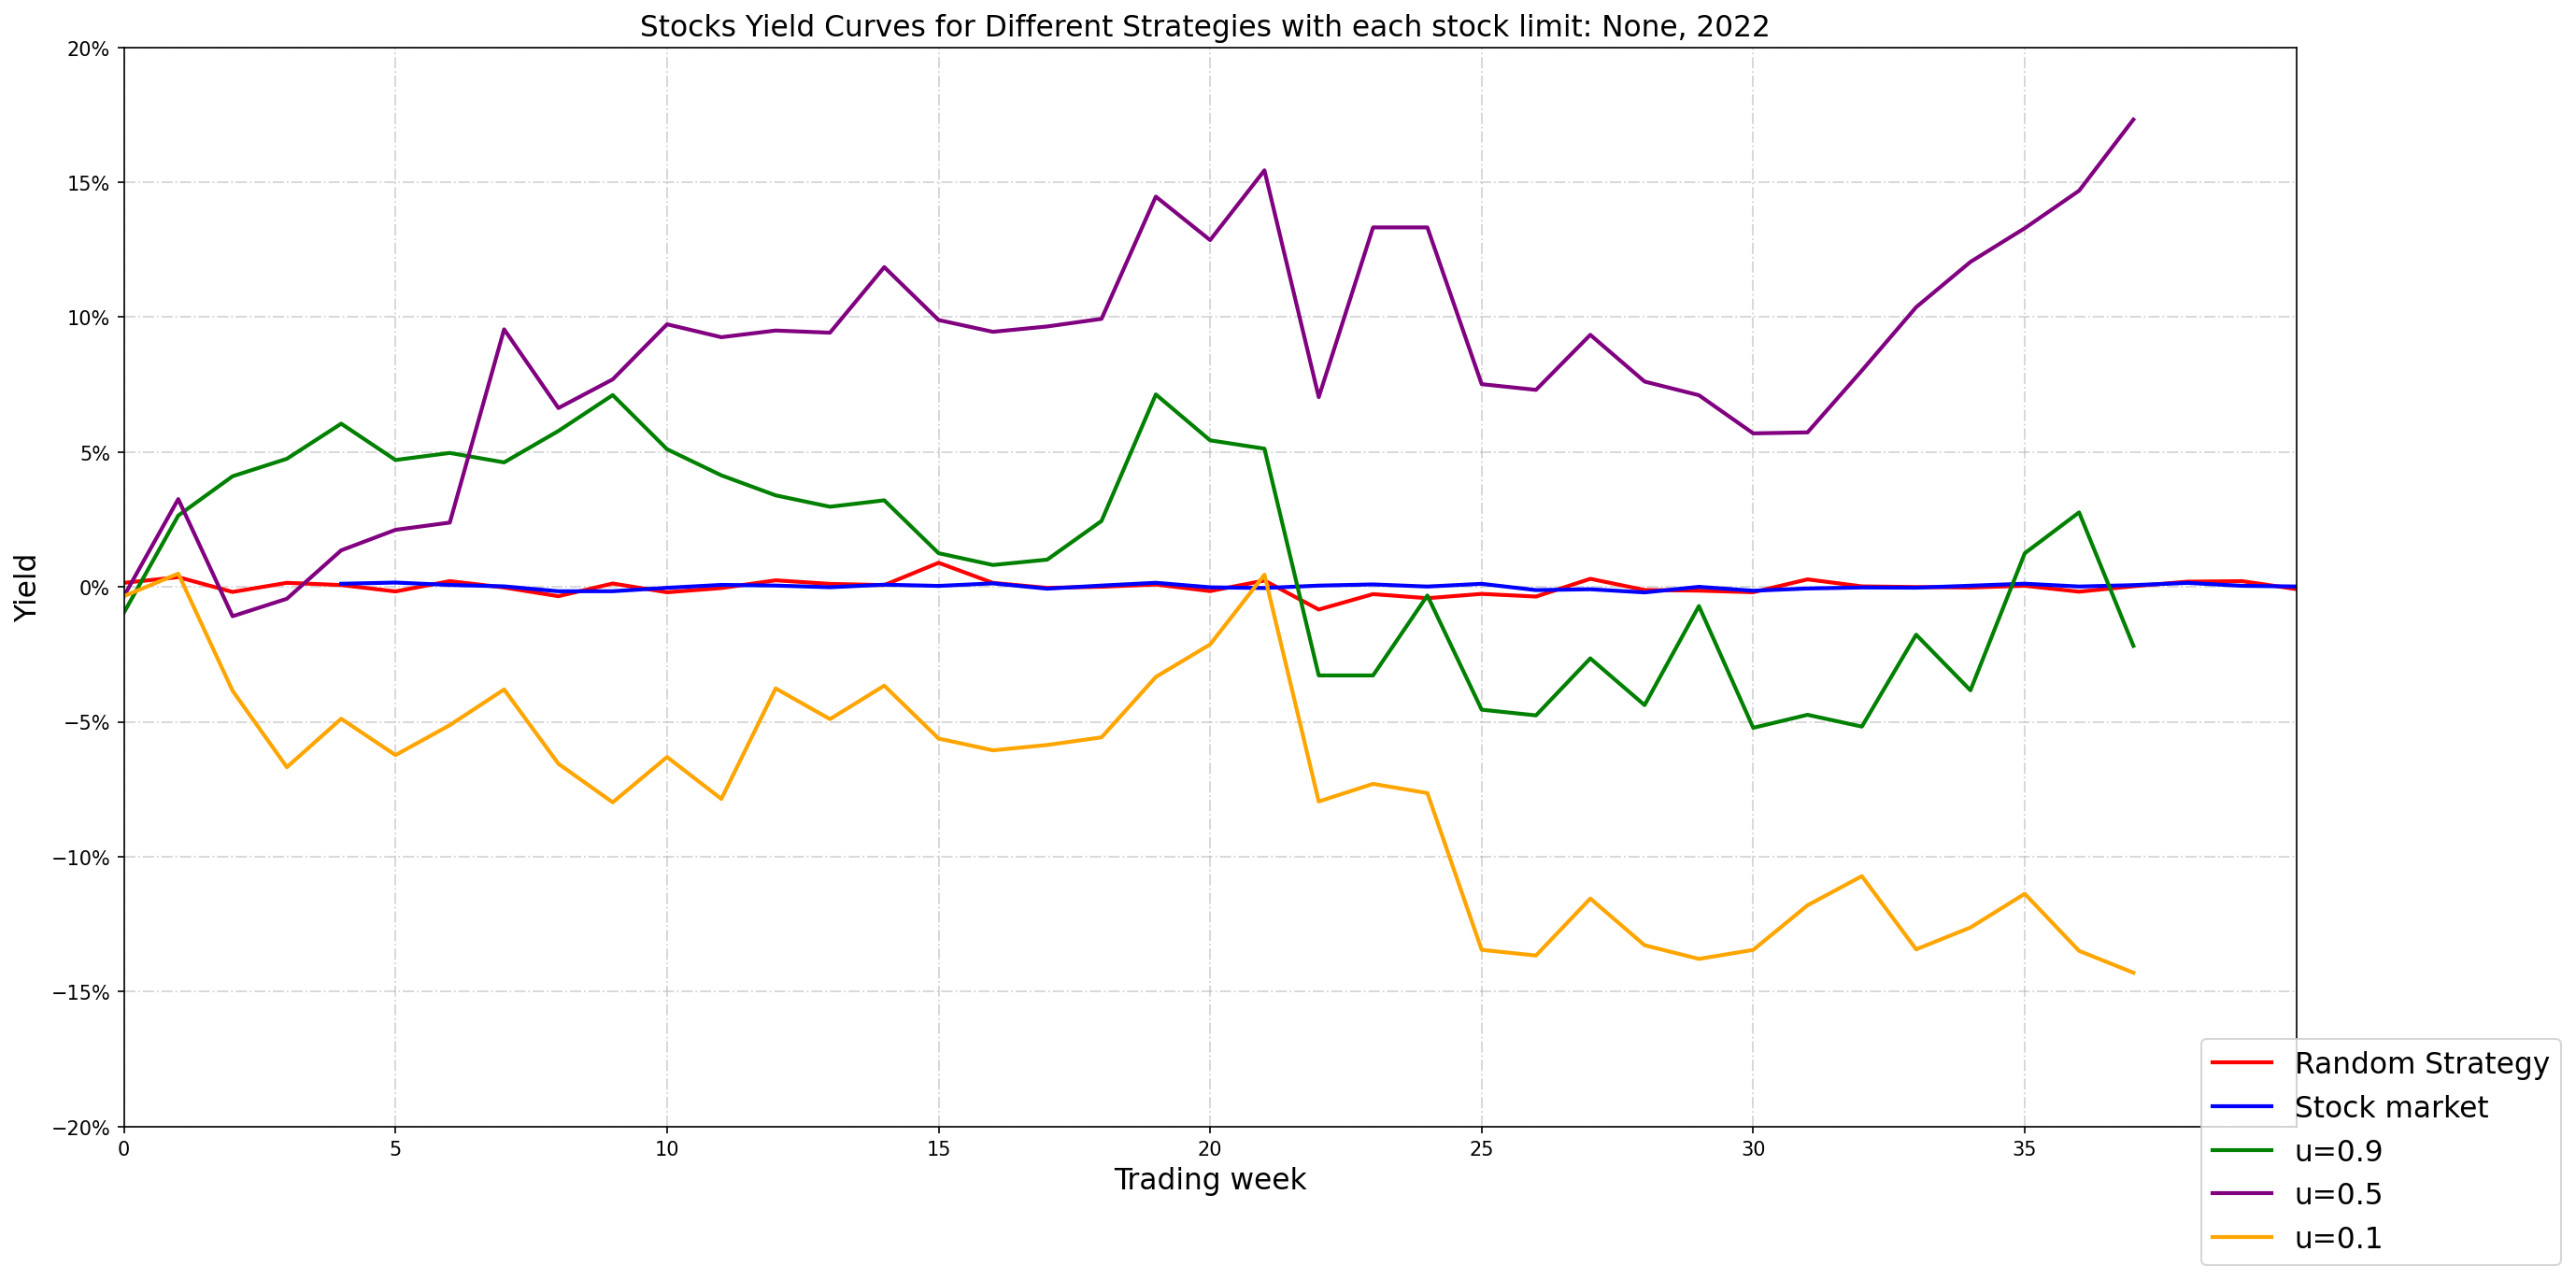

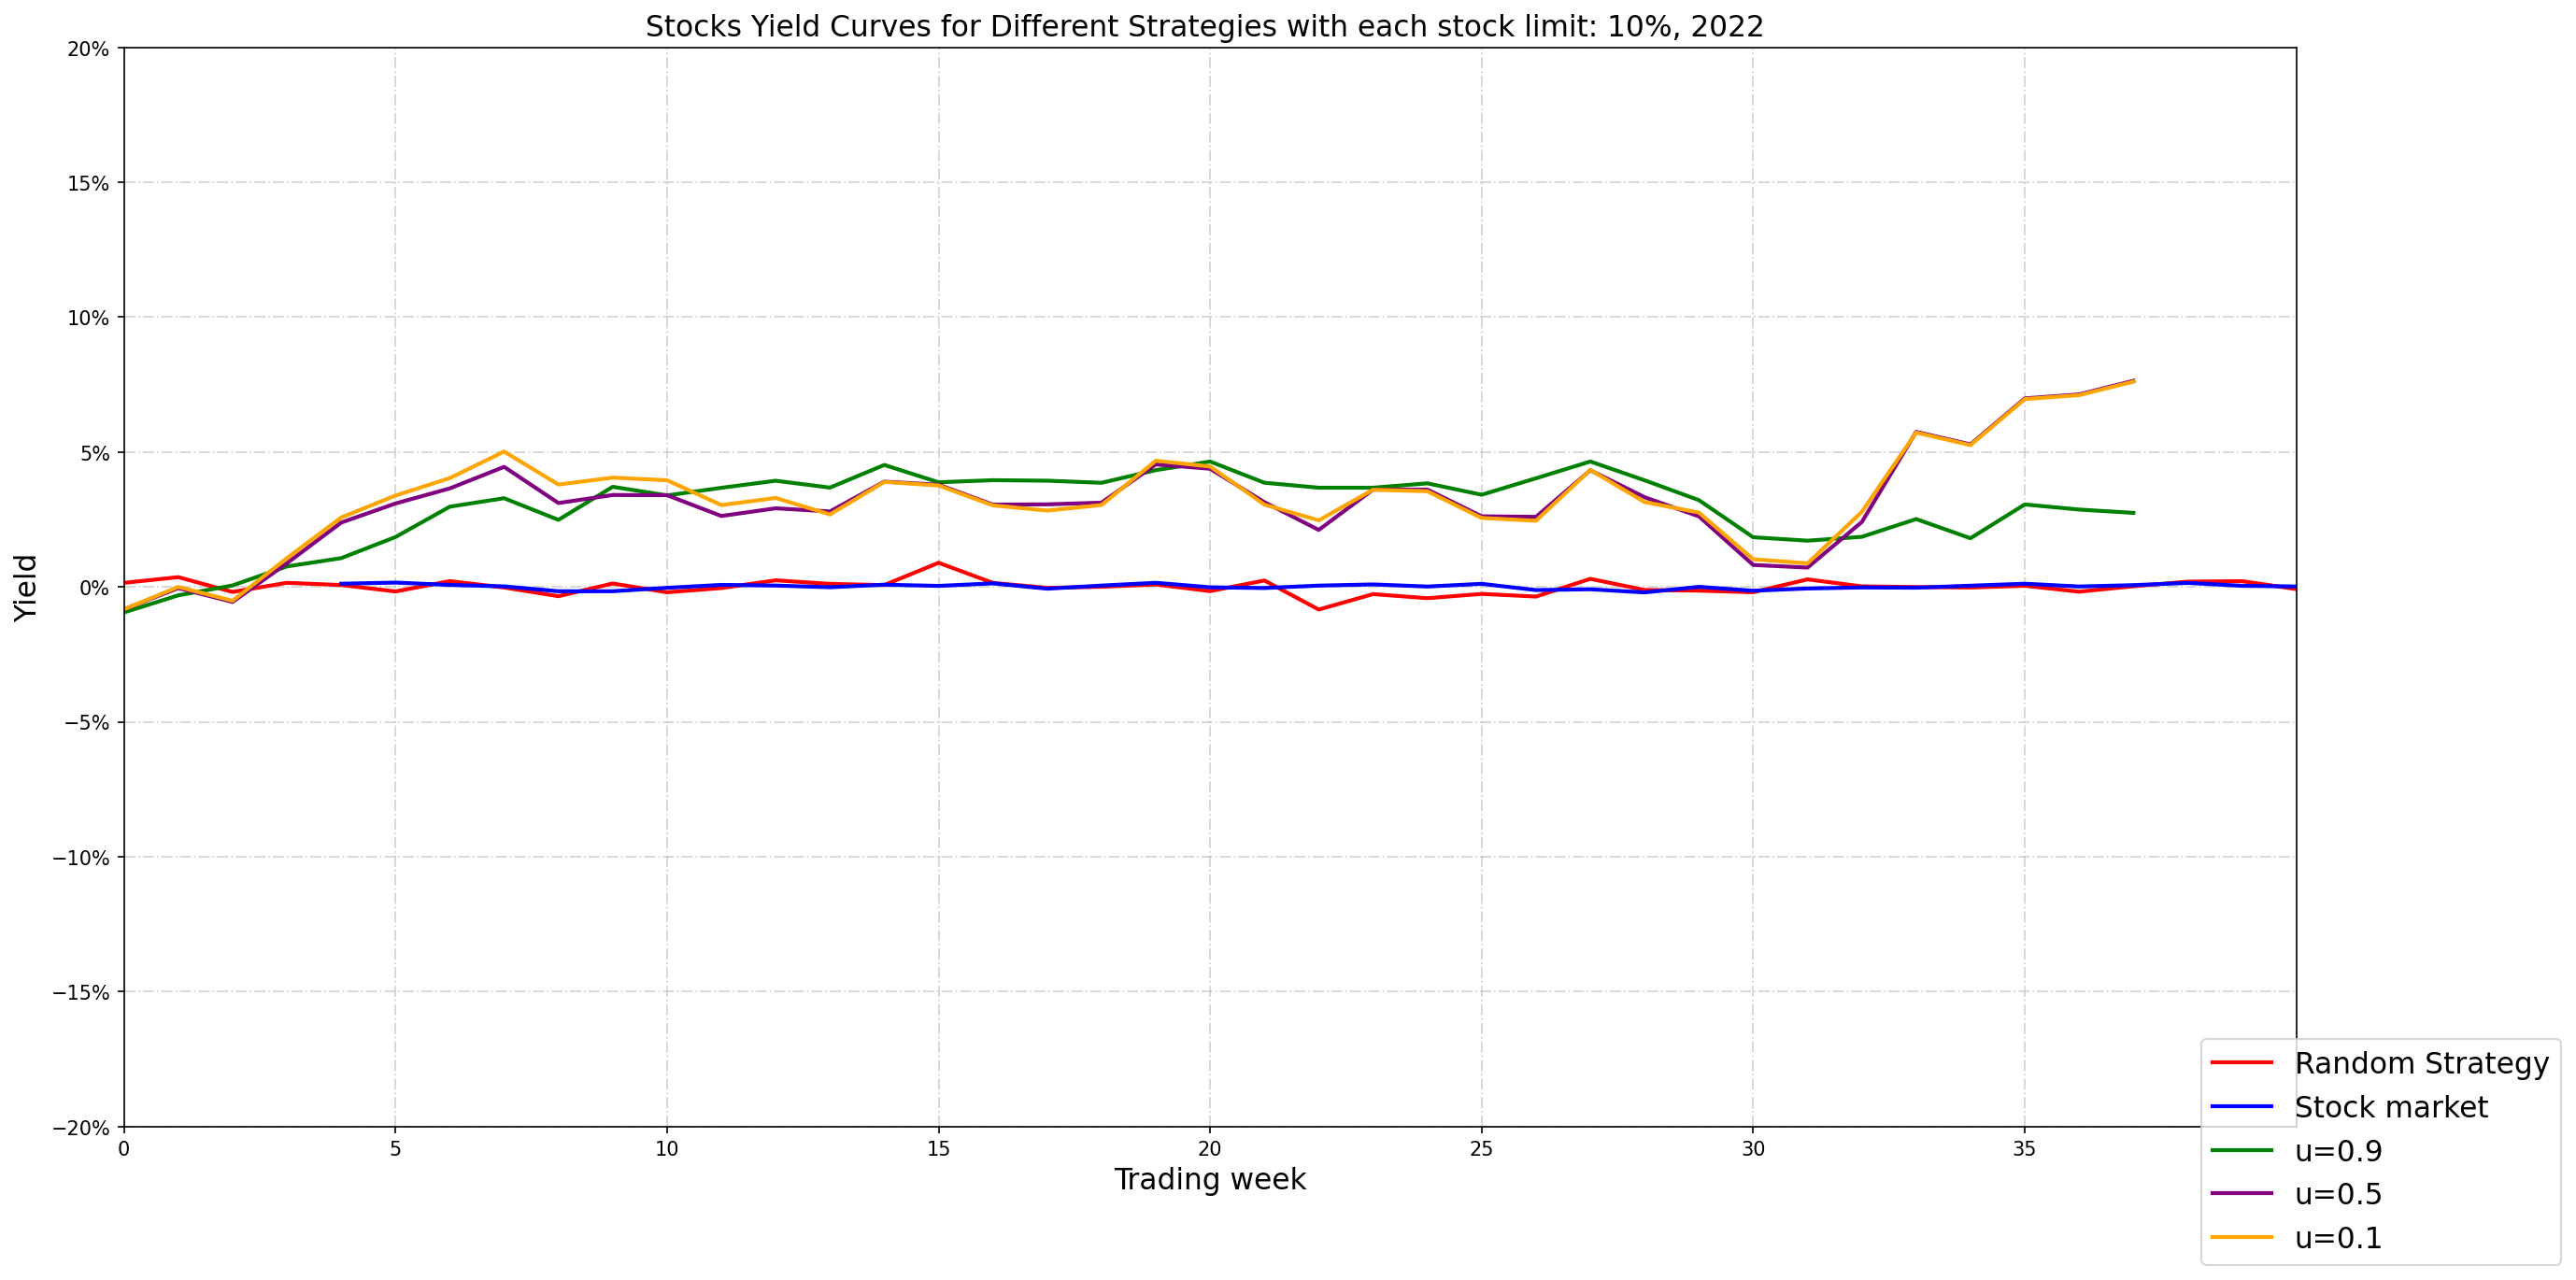

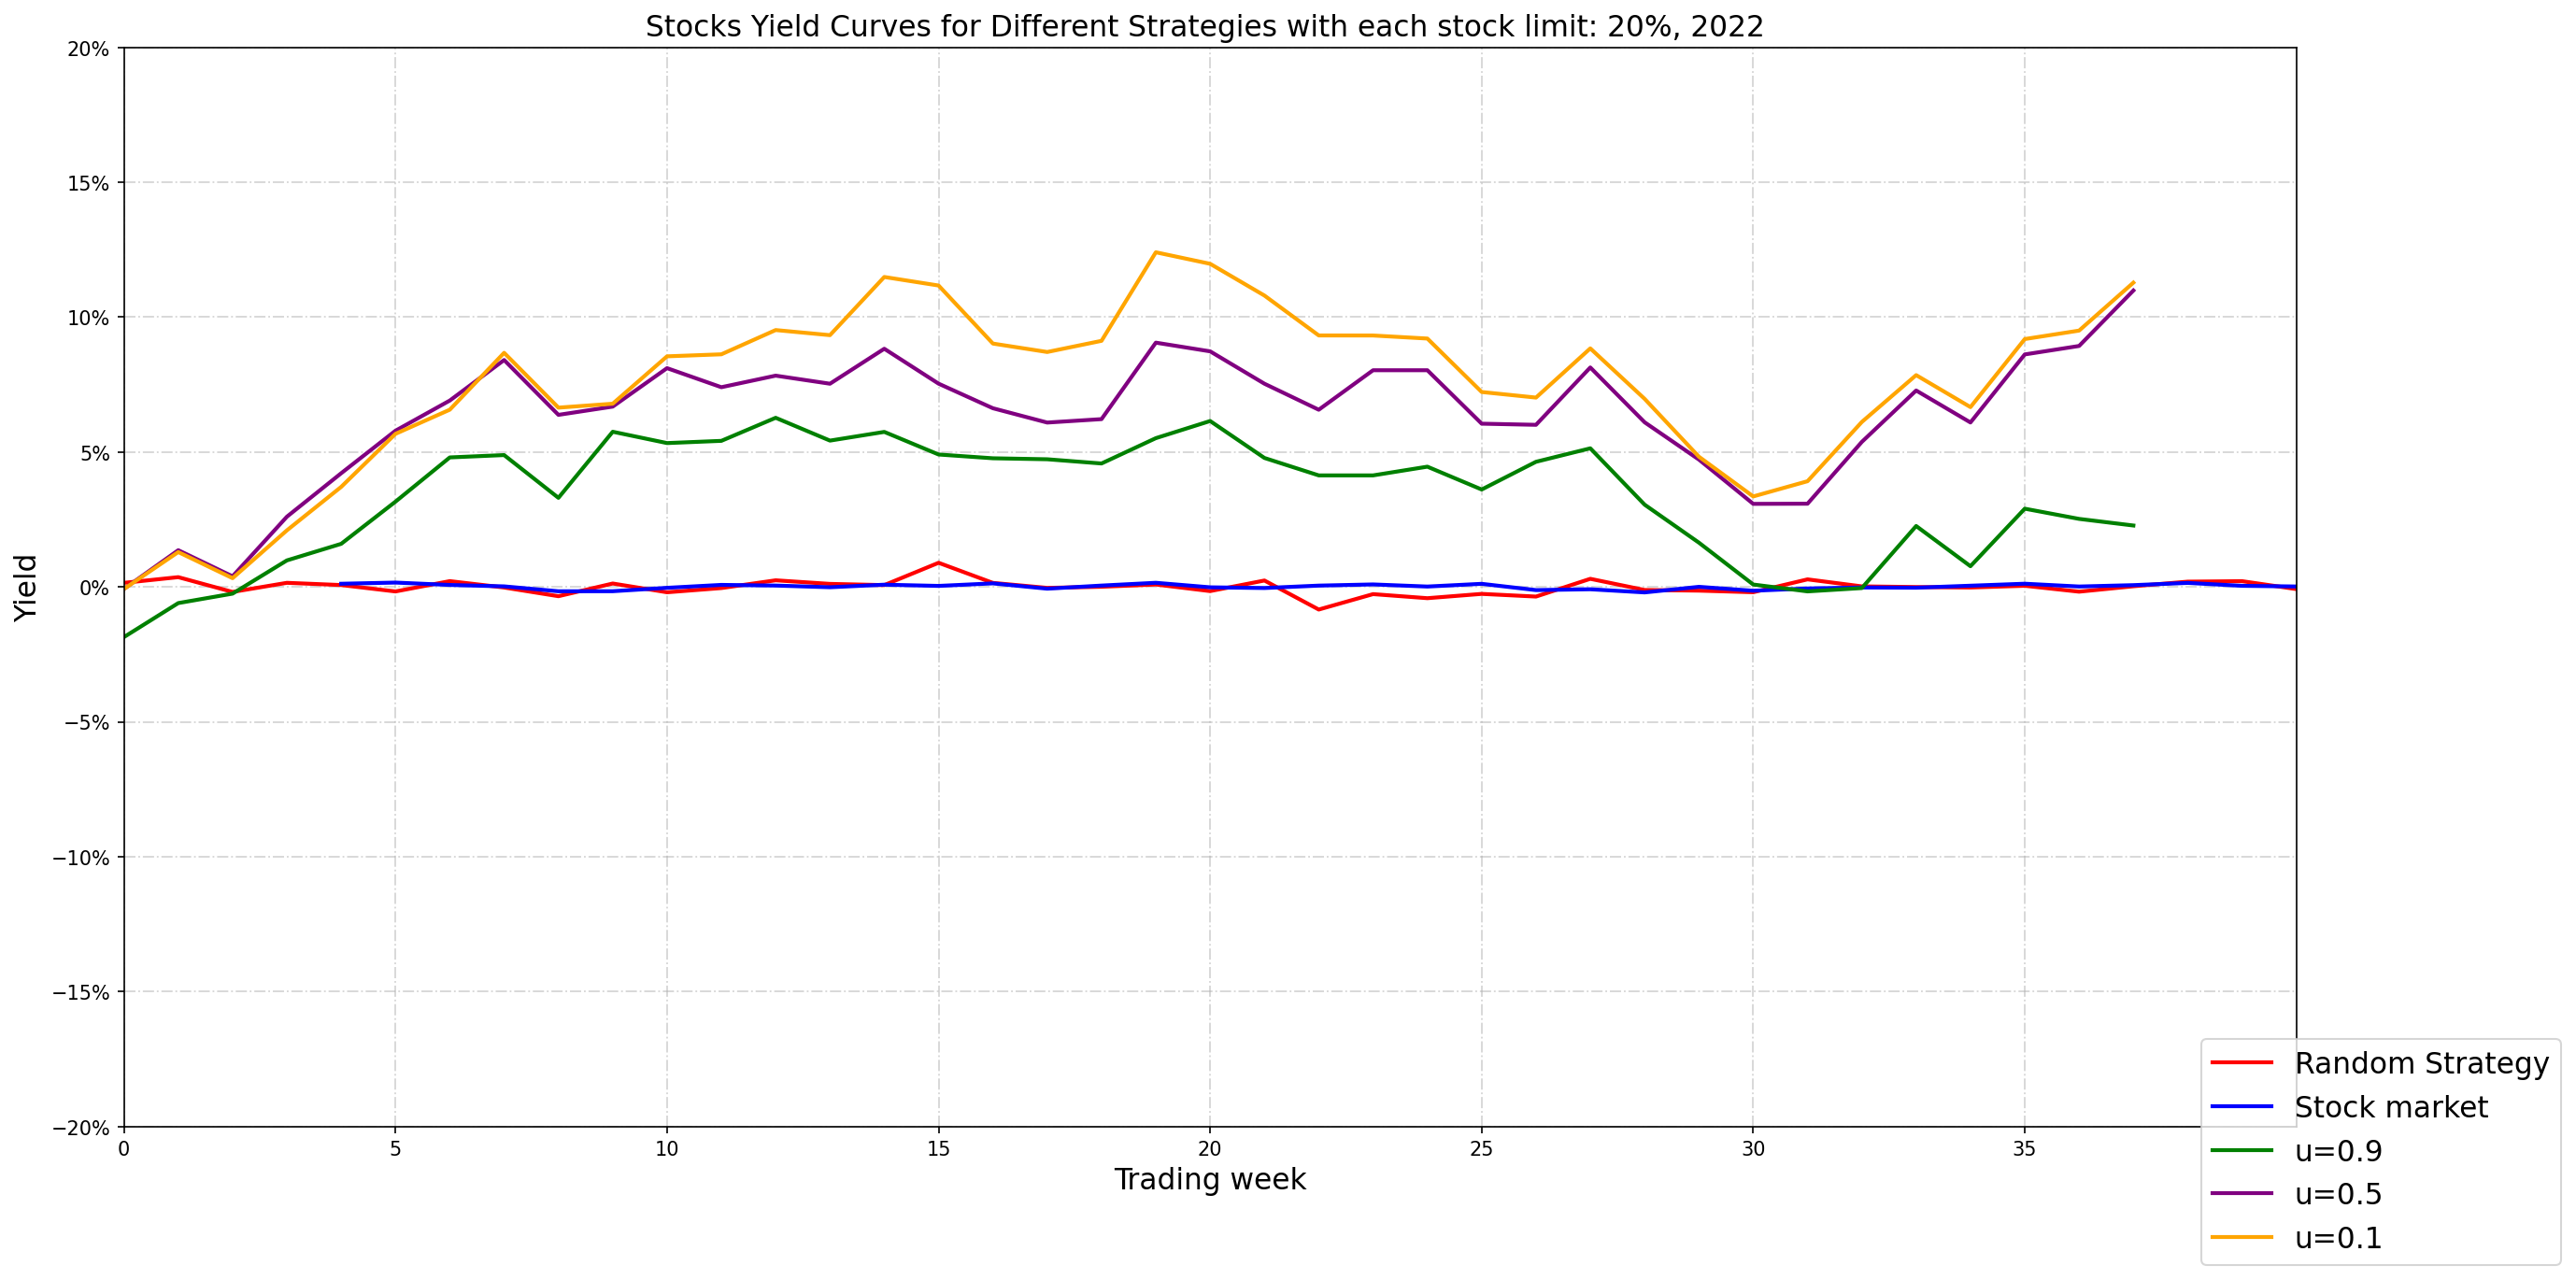

In [37]:
plot('params_30.csv')
plot('params_30_0.1.csv')
plot('params_30_0.2.csv')